<a href="https://colab.research.google.com/github/garfield-gray/DIP/blob/main/dipHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#3/10/2023, Let's begin
import numpy as np
import matplotlib.pyplot as plt

$$First\; Problem$$

In [2]:
#upload the file in advance
im = plt.imread("AnalogScan.jpg", ".jpg")

In [3]:
print(im.shape)

(588, 468, 3)


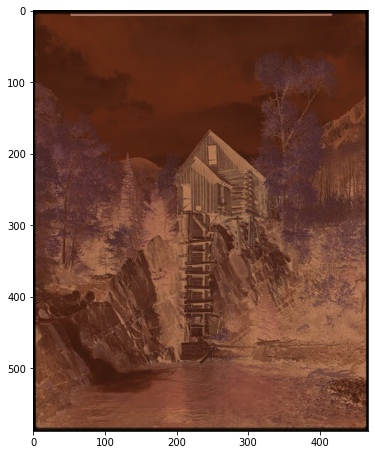

In [4]:
plt.figure(figsize = (6,10))
plt.imshow(im)
plt.show()

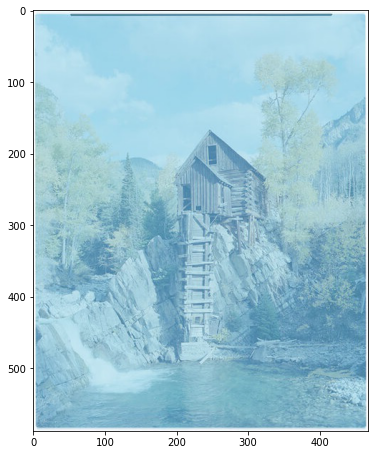

In [5]:
#3/13/2023 let's start again
neg = 255*np.ones(im.shape, dtype=int) -im
plt.figure(figsize = (6,10))
plt.imshow(neg)
plt.show()

In [6]:
#3/14/2023 an instance of matmul (tensor multiplication)
grayeq = neg@np.array([1/3,1/3,1/3])
graybetter = neg@np.array([0.2989,0.5870,0.114])

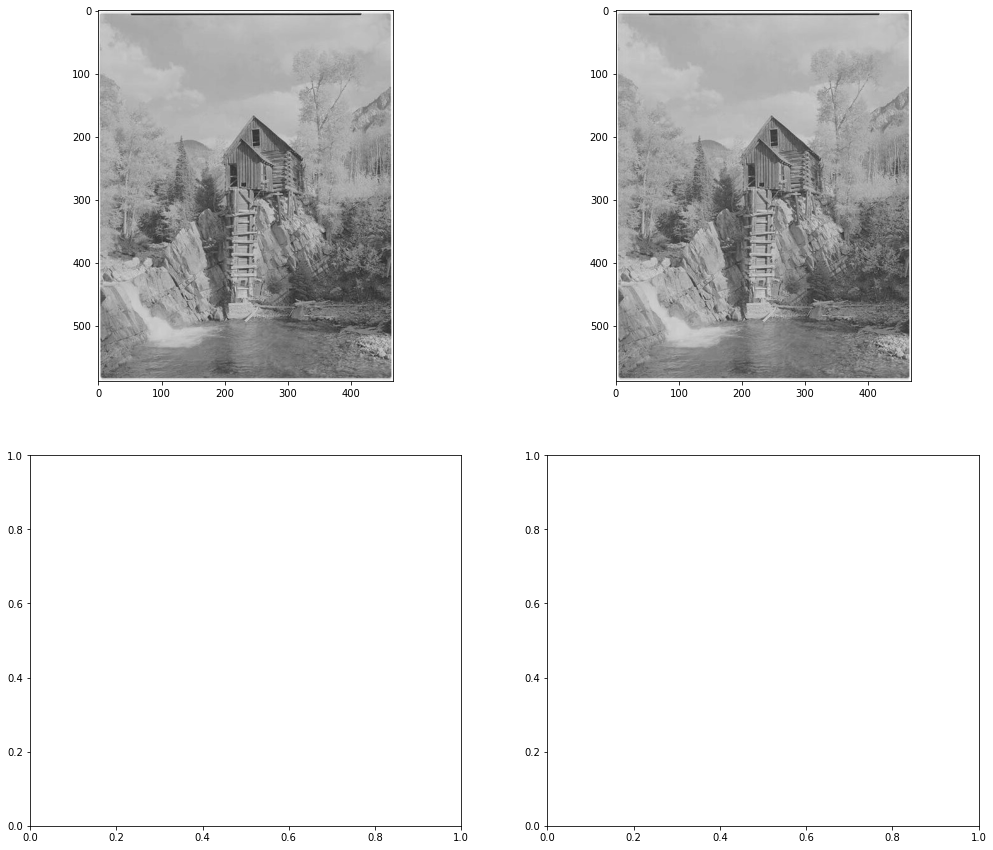

In [7]:
f, axarr = plt.subplots(2,2,figsize=(17,15))
axarr[0,0].imshow(graybetter, cmap = 'gray')
axarr[0,1].imshow(grayeq, cmap = 'gray')
plt.show()

In [8]:
grayeq[359,40],graybetter[359,40] 
#as you can see, they're for sure different, but not that much!!

(145.33333333333331, 141.036)

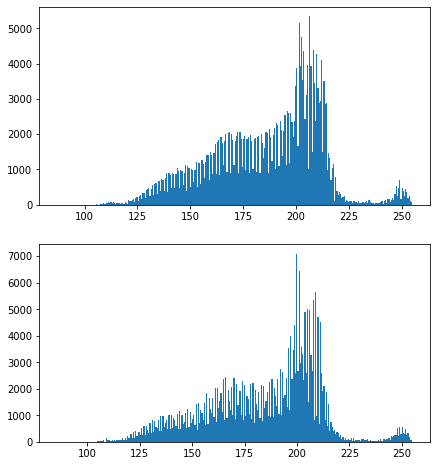

In [9]:
#3/15/2023
f, axarr = plt.subplots(2,figsize=(7,8))
axarr[0].hist(grayeq.flatten(), bins = 300)
axarr[1].hist(graybetter.flatten(), bins = 300)
plt.show()

In [10]:
#making the equalized output
a = np.rint(graybetter.flatten()).astype(int)
b = np.rint(grayeq.flatten()).astype(int)

cumbetter = np.cumsum(np.bincount(a)/np.sum(np.bincount(a)))
cumeq = np.cumsum(np.bincount(b)/np.sum(np.bincount(b)))


#these Values maps the current pixels to the desired equal ones (look at the for)
outputValueBetter = np.rint(cumbetter*255).astype(int)
outputValueEq = np.rint(cumeq*255).astype(int)

graybetterEq = np.zeros(graybetter.shape, dtype=int)
grayeqEq = np.zeros(grayeq.shape, dtype=int)


for i in range(graybetter.shape[0]):
  for j in range(graybetter.shape[1]):
    graybetterEq[i,j] = outputValueBetter[np.rint(graybetter[i,j]).astype(int)]

for i in range(grayeq.shape[0]):
  for j in range(grayeq.shape[1]):
    grayeqEq[i,j] = outputValueEq[np.rint(grayeq[i,j]).astype(int)]

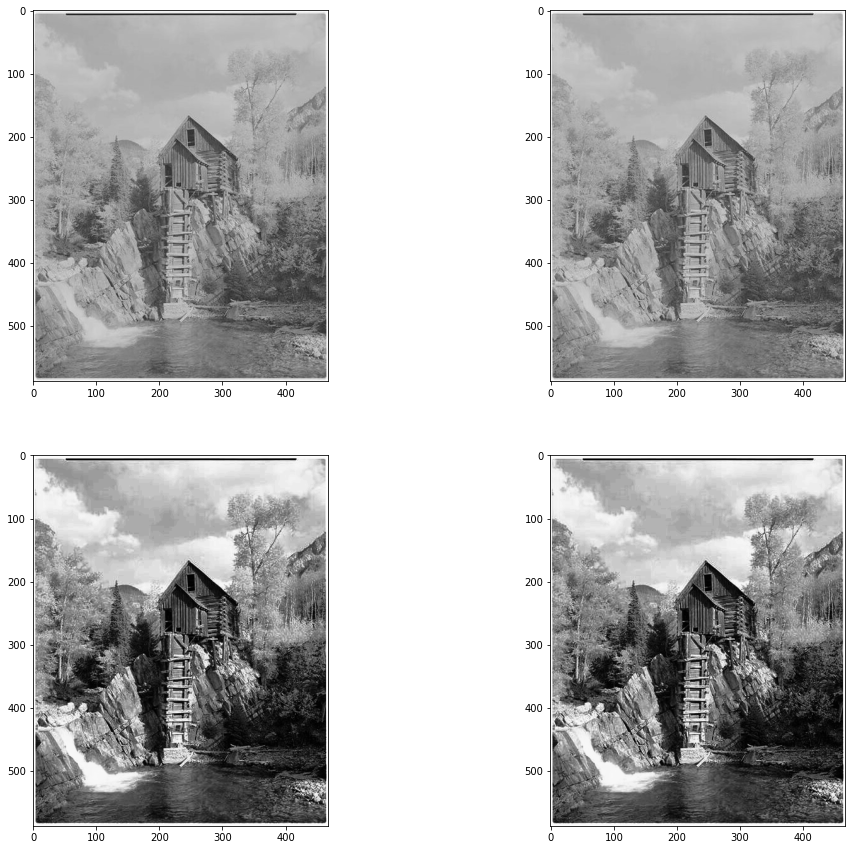

In [11]:
f, axarr = plt.subplots(2,2,figsize=(17,15))
axarr[0,0].imshow(graybetter, cmap = 'gray')
axarr[0,1].imshow(grayeq, cmap = 'gray')
axarr[1,0].imshow(graybetterEq, cmap = 'gray')
axarr[1,1].imshow(grayeqEq, cmap = 'gray')
plt.show()


$$Better\;is\;better\;:)$$

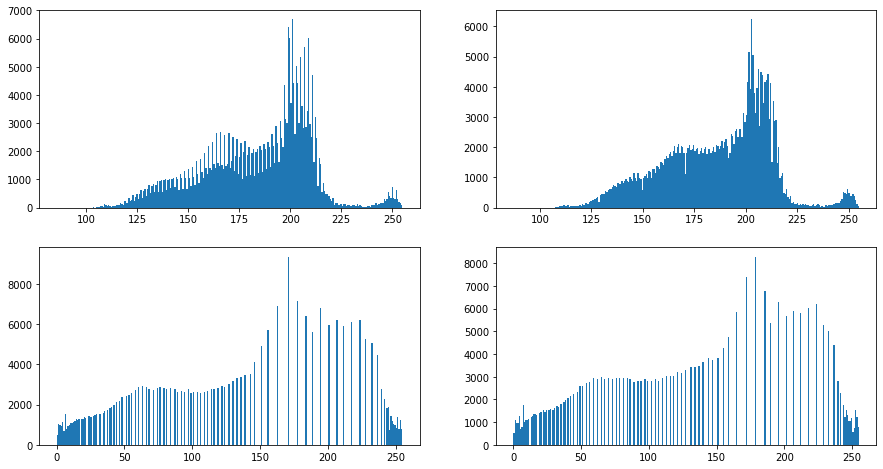

In [12]:
#3/15/2023
f, axarr = plt.subplots(2,2,figsize=(15,8))
axarr[0,0].hist(graybetter.flatten(), bins = 256)
axarr[0,1].hist(grayeq.flatten(), bins = 256)
axarr[1,0].hist(graybetterEq.flatten(), bins = 256)
axarr[1,1].hist(grayeqEq.flatten(), bins = 256)

plt.show()

$$Second\;Problem$$

In [13]:
#upload the file in advance
im2 = plt.imread("1008_IM-0009-2001.dcm.png", ".png")

In [14]:
print(im2.shape)

(2048, 2048, 4)


In [15]:
print(im2[:,:,0])
print(im2[:,:,0]-im2[:,:,1])
print(im2[:,:,1]-im2[:,:,2])
print(im2[:,:,3])

[[0.49019608 0.49019608 0.48235294 ... 0.18431373 0.6392157  0.5568628 ]
 [0.4627451  0.4862745  0.47058824 ... 0.16862746 0.63529414 0.10588235]
 [0.4745098  0.4862745  0.4745098  ... 0.15686275 0.13333334 0.07843138]
 ...
 [0.4117647  0.3764706  0.8784314  ... 0.07450981 0.05098039 0.5294118 ]
 [0.4392157  0.38039216 0.40392157 ... 0.08235294 0.04313726 0.05490196]
 [0.39607844 0.40392157 0.8784314  ... 0.0627451  0.03137255 0.05882353]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


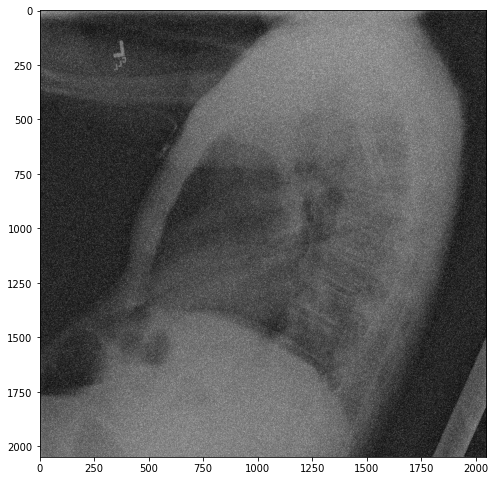

In [24]:
#3/21/2023
imm = im2[:,:,0]
plt.figure(figsize = (8,12))
plt.imshow(imm, cmap = "gray")
plt.show()

In [22]:
#3/22/2023
#Average
m, n = imm.shape

win = np.ones([3,3], dtype=int)/9

immAveraged = np.zeros([m, n])

#it may take some time
for i in range(1, m-1):
  for j in range(1, n-1):
    newPix = imm[i-1, j-1]*win[0, 0]+imm[i-1, j]*win[0, 1]+imm[i-1, j + 1]*win[0, 2]+imm[i, j-1]*win[1, 0]+ imm[i, j]*win[1, 1]+imm[i, j + 1]*win[1, 2]+imm[i + 1, j-1]*win[2, 0]+imm[i + 1, j]*win[2, 1]+imm[i + 1, j + 1]*win[2, 2]
    immAveraged[i, j] = newPix


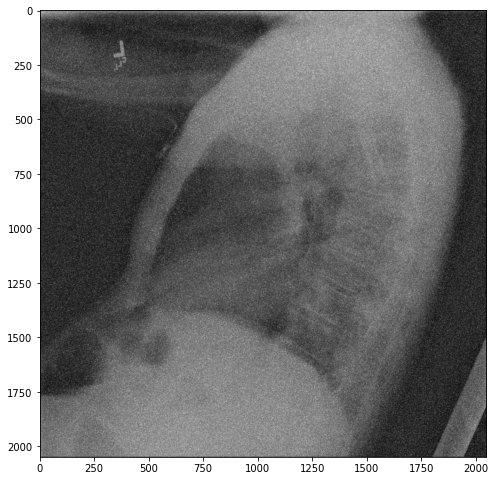

In [23]:
plt.figure(figsize = (8,12))
plt.imshow(immAveraged, cmap = "gray")
plt.show()

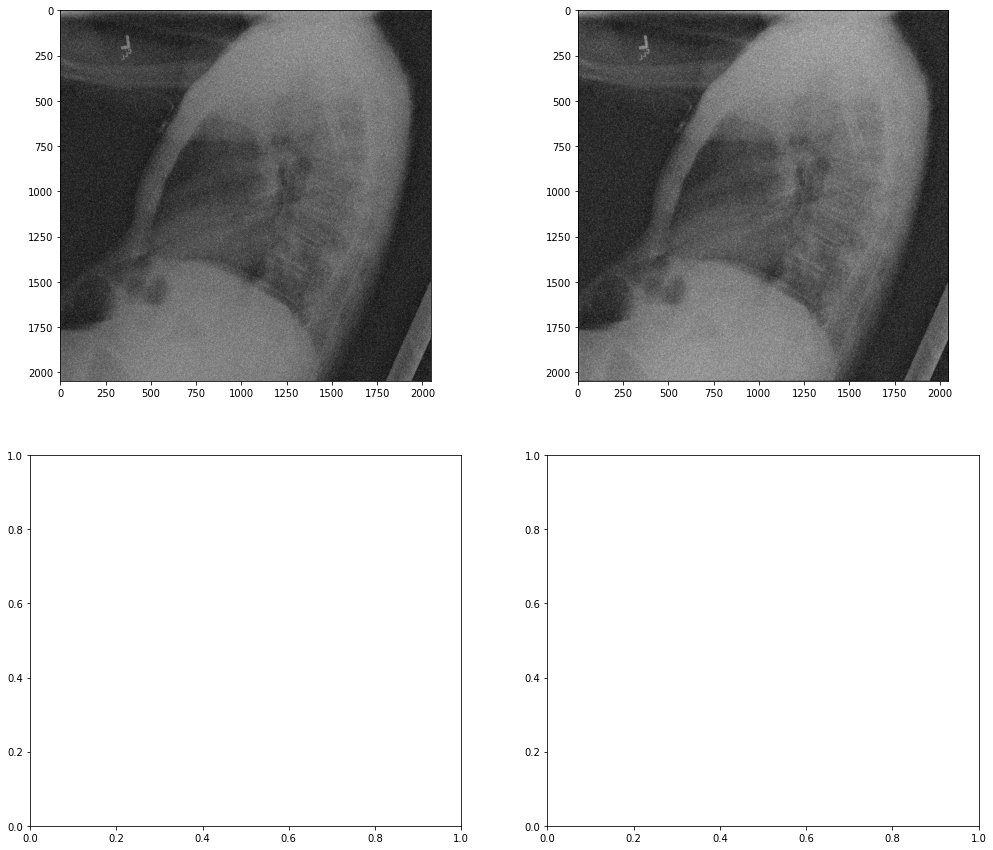

In [25]:
f, axarr = plt.subplots(2,2,figsize=(17,15))
axarr[0,0].imshow(imm, cmap = 'gray')
axarr[0,1].imshow(immAveraged, cmap = 'gray')
plt.show()

In [30]:
#Median
m, n = imm.shape

immMedian = np.zeros([m, n])

#it may take some time
for i in range(1, m-1):
  for j in range(1, n-1):
    immMedian[i, j] = np.median([imm[i-1, j-1],imm[i-1, j],imm[i-1, j + 1],imm[i, j-1],imm[i, j],imm[i, j + 1],imm[i + 1, j-1],imm[i + 1, j],imm[i + 1, j + 1]])
  



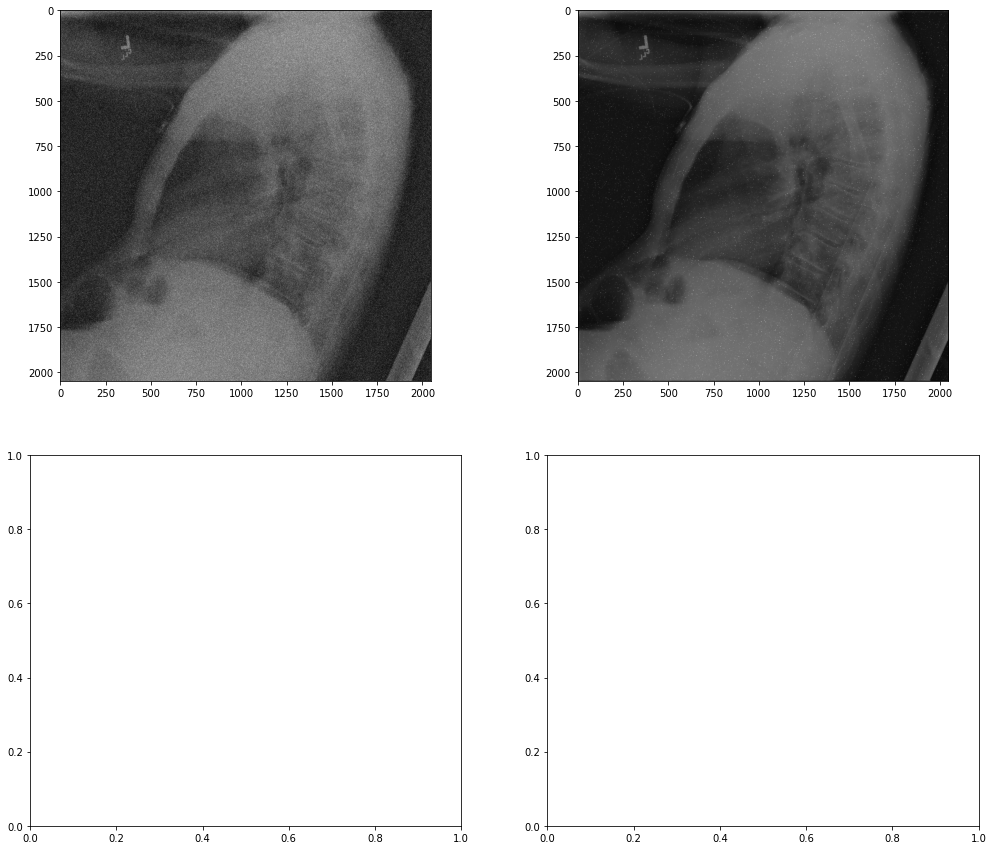

In [31]:
f, axarr = plt.subplots(2,2,figsize=(17,15))
axarr[0,0].imshow(imm, cmap = 'gray')
axarr[0,1].imshow(immMedian, cmap = 'gray')
plt.show()
#median works very well!!

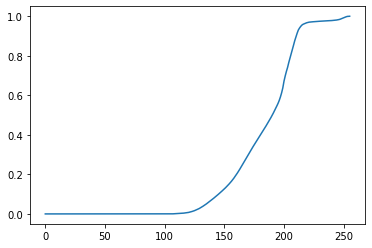

In [ ]:
# graybettereq 
# np.zeros((3,4,2))
plt.plot()

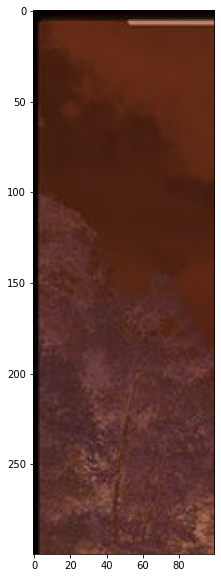

In [ ]:

plt.figure(figsize = (6,10))
plt.imshow(im[:300,:100,:])
plt.show()

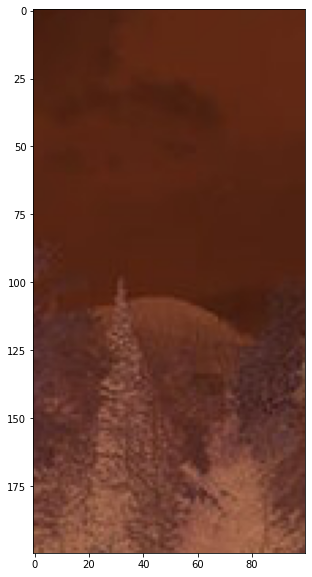

In [ ]:
plt.figure(figsize = (6,10))
plt.imshow(im[100:300,100:200,:])
plt.show()

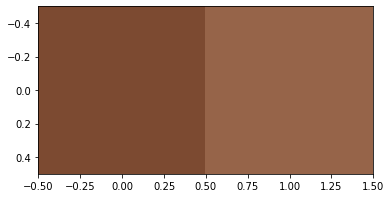

In [ ]:
plt.figure(figsize = (6,10))
plt.imshow(im[299:300,98:100,:])
plt.show()

In [ ]:
im[299:300,98:100,:]

array([[[124,  74,  49],
        [150, 100,  73]]], dtype=uint8)

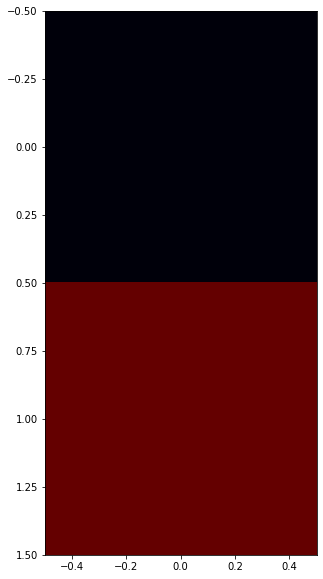

In [ ]:
plt.figure(figsize = (6,10))
plt.imshow(np.array([[[0, 0, 10]],[[100,0,0]]]))
plt.show()